# Ex 1

In [12]:
library('ggplot2')

In [78]:
df = read.csv('../Du_lieu/baseball.csv')
head(df)

,Name,Team,Position,Height,Weight,Age,PosCategory
,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<chr>
1,Adam_Donachie,BAL,Catcher,74,180,22.99,Catcher
2,Paul_Bako,BAL,Catcher,74,215,34.69,Catcher
3,Ramon_Hernandez,BAL,Catcher,72,210,30.78,Catcher
4,Kevin_Millar,BAL,First_Baseman,72,210,35.43,Infielder
5,Chris_Gomez,BAL,First_Baseman,73,188,35.71,Infielder
6,Brian_Roberts,BAL,Second_Baseman,69,176,29.39,Infielder


In [79]:
dim(df)

[1] 1015    7

In [80]:
summary(df)

     Name               Team             Position             Height     
 Length:1015        Length:1015        Length:1015        Min.   :67.00  
 Class :character   Class :character   Class :character   1st Qu.:72.00  
 Mode  :character   Mode  :character   Mode  :character   Median :74.00  
                                                          Mean   :73.69  
                                                          3rd Qu.:75.00  
                                                          Max.   :83.00  
     Weight           Age        PosCategory       
 Min.   :150.0   Min.   :20.90   Length:1015       
 1st Qu.:186.0   1st Qu.:25.41   Class :character  
 Median :200.0   Median :27.90   Mode  :character  
 Mean   :201.3   Mean   :28.71                     
 3rd Qu.:215.0   3rd Qu.:31.19                     
 Max.   :290.0   Max.   :48.52                     

In [81]:
str(df)

'data.frame':	1015 obs. of  7 variables:
 $ Name       : chr  "Adam_Donachie" "Paul_Bako" "Ramon_Hernandez" "Kevin_Millar" ...
 $ Team       : chr  "BAL" "BAL" "BAL" "BAL" ...
 $ Position   : chr  "Catcher" "Catcher" "Catcher" "First_Baseman" ...
 $ Height     : int  74 74 72 72 73 69 69 71 76 71 ...
 $ Weight     : int  180 215 210 210 188 176 209 200 231 180 ...
 $ Age        : num  23 34.7 30.8 35.4 35.7 ...
 $ PosCategory: chr  "Catcher" "Catcher" "Catcher" "Infielder" ...


In [82]:
df['Height'] = df['Height'] * 0.0254
df['Weight'] = df['Weight'] * 0.453592

In [83]:
df = df[c('Height', 'Weight')]
head(df)

,Height,Weight
,<dbl>,<dbl>
1,1.8796,81.64656
2,1.8796,97.52228
3,1.8288,95.25432
4,1.8288,95.25432
5,1.8542,85.27530
6,1.7526,79.83219


`geom_smooth()` using formula 'y ~ x'



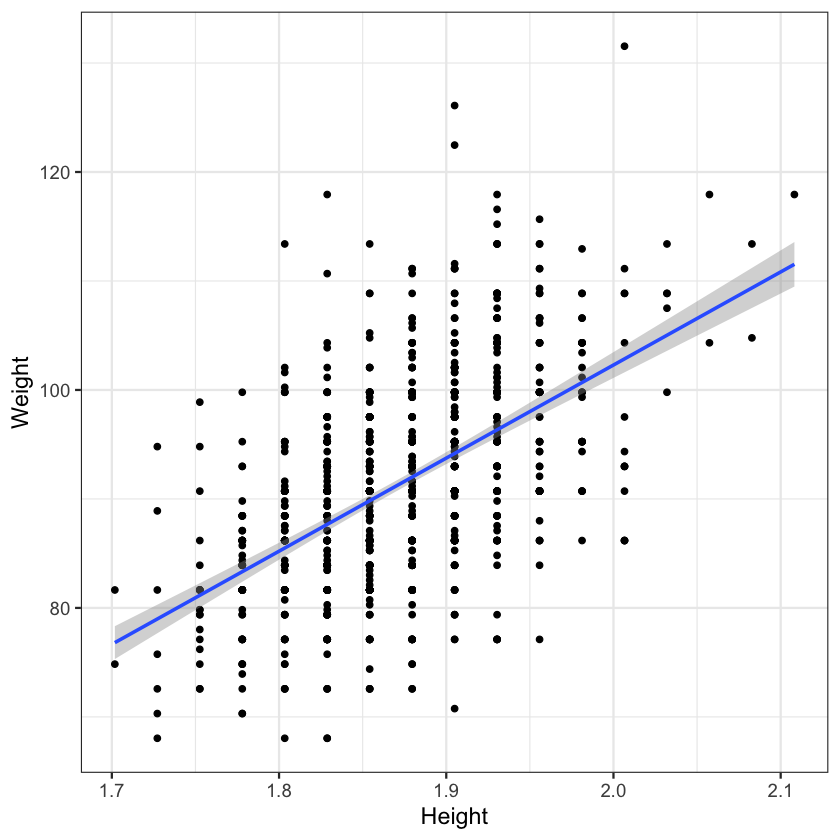

In [84]:
plot = ggplot(data = df, aes(x = Height, y = Weight)) +
       geom_point() + geom_smooth(method = 'lm') + theme_bw(base_size = 14)
plot

`geom_smooth()` using formula 'y ~ x'



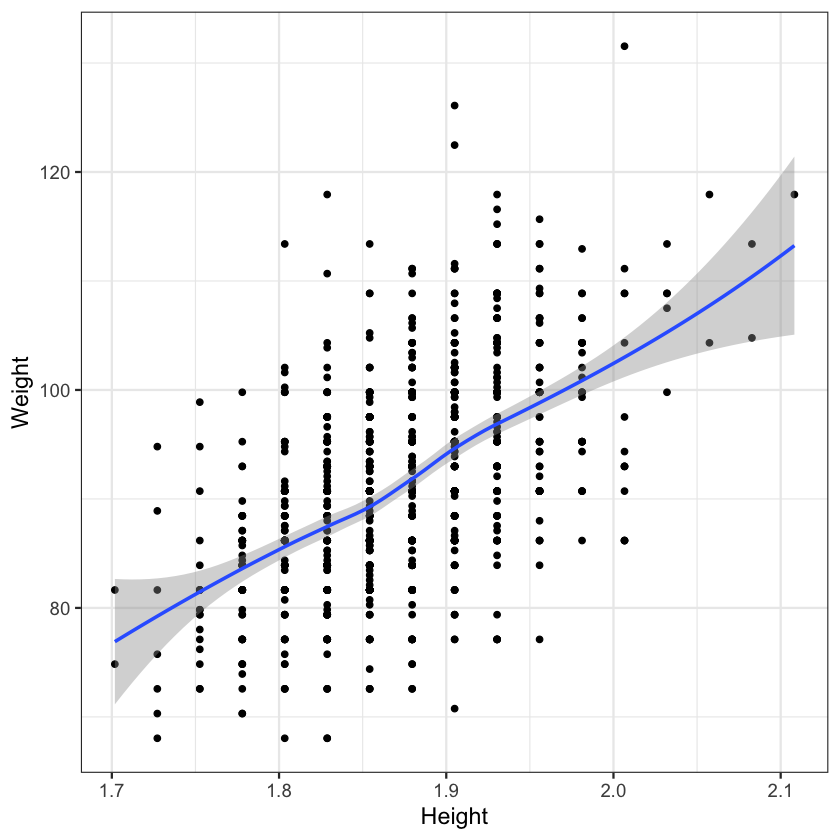

In [85]:
plot = ggplot(data = df, aes(x = Height, y = Weight)) +
       geom_point() + geom_smooth(method = 'loess') + theme_bw(base_size = 14)

plot

In [86]:
cor(df$Height, df$Weight)

[1] 0.5315393

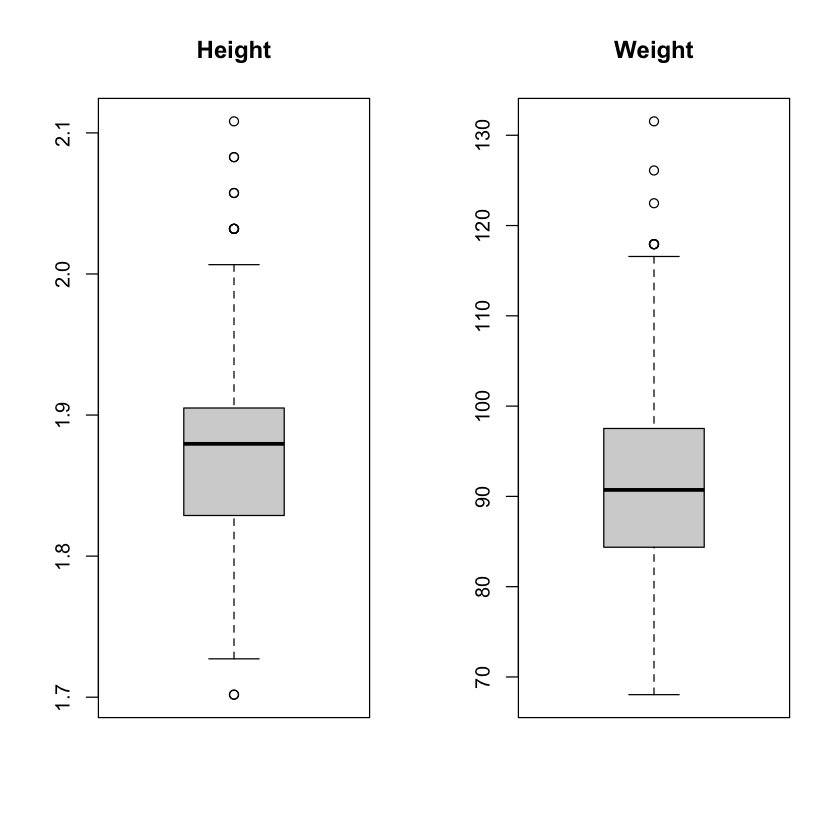

In [87]:
par(mfrow = c(1, 2))
boxplot(df$Height, main = 'Height')
boxplot(df$Weight, main = 'Weight')

In [88]:
weight_outliers = boxplot.stats(df$Weight)$out
weight_outliers

[1] 117.9339 122.4698 131.5417 126.0986 117.9339 117.9339 117.9339

In [89]:
height_outliers = boxplot.stats(df$Height)$out
height_outliers

[1] 2.0574 2.0320 2.0320 2.0320 2.0320 2.0828 2.0320 2.0574 2.0828 2.1082
[11] 1.7018 1.7018

In [90]:
df = df[!(df$Height %in% height_outliers),]
df = df[!(df$Weight %in% weight_outliers),]
dim(df)

[1] 998   2

In [91]:
set.seed(1)

train_idx = sample(1:nrow(df), 0.7*nrow(df))
train_df = df[train_idx,]
test_df = df[-train_idx,]
print(dim(train_df))
print(dim(test_df))

[1] 698   2
[1] 300   2


In [92]:
model = lm(Weight ~ Height, data=train_df)
summary(model)


Call:
lm(formula = Weight ~ Height, data = train_df)

Residuals:
     Min       1Q   Median       3Q      Max 
-23.2923  -5.7899   0.2633   5.3622  27.6665 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -61.969     10.252  -6.045 2.44e-09 ***
Height        81.901      5.481  14.943  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.92 on 696 degrees of freedom
Multiple R-squared:  0.2429,	Adjusted R-squared:  0.2418 
F-statistic: 223.3 on 1 and 696 DF,  p-value: < 2.2e-16


In [93]:
mse = mean(model$residuals^2)
rmse = sqrt(mse)
print(mse)
print(rmse)

[1] 62.54825
[1] 7.908745


In [94]:
predictions = predict(model, test_df)
test_mse = mean((test_df$Weight - predictions)^2)
test_rmse = sqrt(test_mse)
print(test_mse)
print(test_rmse)

[1] 56.06701
[1] 7.487791


Nhận xét: Model không bị overfiting

In [96]:
beta = coef(model)['Height']
beta

Height 
81.90135

In [97]:
intercept = coef(model)[1]
intercept

(Intercept) 
  -61.96942

In [98]:
x = c(1.775, 1.825, 1.925)
y = predict(model, data.frame(Height=x))
y

1        2        3 
83.40548 87.50055 95.69069

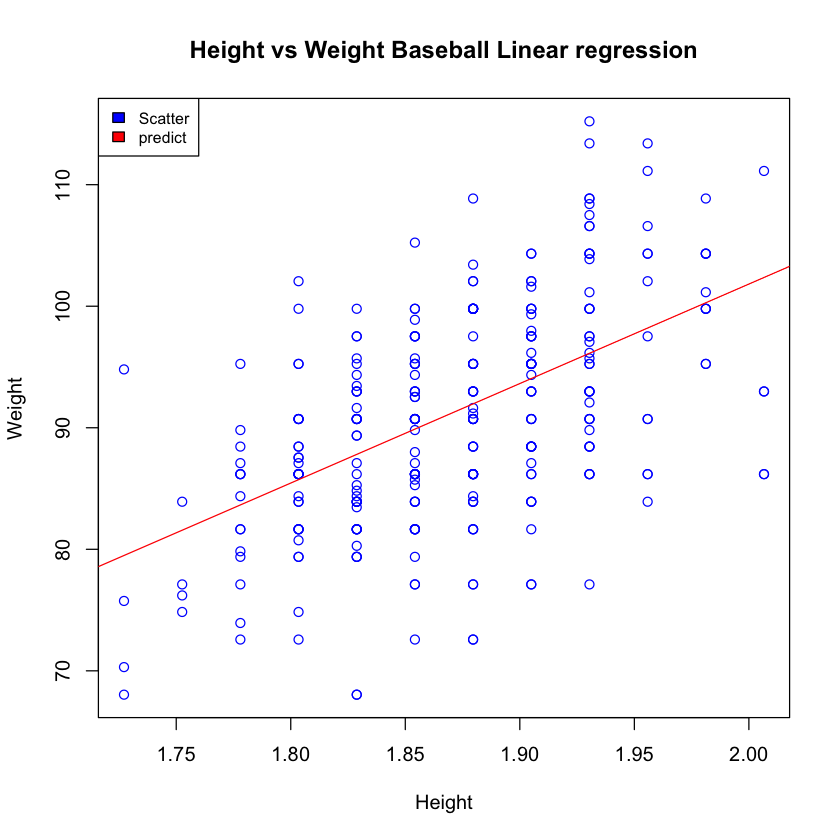

In [99]:
plot(test_df$Height, test_df$Weight, main = 'Height vs Weight Baseball Linear regression',
     xlab = 'Height', ylab = 'Weight', col='blue')
abline(model, df, col = 'red')
legend('topleft', c('Scatter', 'predict'), cex = 0.8, fill = c('blue', 'red'))

# Ex 2

In [100]:
df = read.csv('../Du_lieu/petrol_consumption.csv')
head(df)

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence...,Petrol_Consumption
,<dbl>,<int>,<int>,<dbl>,<int>
1,9.0,3571,1976,0.525,541
2,9.0,4092,1250,0.572,524
3,9.0,3865,1586,0.580,561
4,7.5,4870,2351,0.529,414
5,8.0,4399,431,0.544,410
6,10.0,5342,1333,0.571,457


In [101]:
dim(df)

[1] 48  5

In [102]:
str(df)

'data.frame':	48 obs. of  5 variables:
 $ Petrol_tax                  : num  9 9 9 7.5 8 10 8 8 8 7 ...
 $ Average_income              : int  3571 4092 3865 4870 4399 5342 5319 5126 4447 4512 ...
 $ Paved_Highways              : int  1976 1250 1586 2351 431 1333 11868 2138 8577 8507 ...
 $ Population_Driver_licence...: num  0.525 0.572 0.58 0.529 0.544 0.571 0.451 0.553 0.529 0.552 ...
 $ Petrol_Consumption          : int  541 524 561 414 410 457 344 467 464 498 ...


In [103]:
summary(df)

   Petrol_tax     Average_income Paved_Highways  Population_Driver_licence...
 Min.   : 5.000   Min.   :3063   Min.   :  431   Min.   :0.4510              
 1st Qu.: 7.000   1st Qu.:3739   1st Qu.: 3110   1st Qu.:0.5298              
 Median : 7.500   Median :4298   Median : 4736   Median :0.5645              
 Mean   : 7.668   Mean   :4242   Mean   : 5565   Mean   :0.5703              
 3rd Qu.: 8.125   3rd Qu.:4579   3rd Qu.: 7156   3rd Qu.:0.5952              
 Max.   :10.000   Max.   :5342   Max.   :17782   Max.   :0.7240              
 Petrol_Consumption
 Min.   :344.0     
 1st Qu.:509.5     
 Median :568.5     
 Mean   :576.8     
 3rd Qu.:632.8     
 Max.   :968.0     

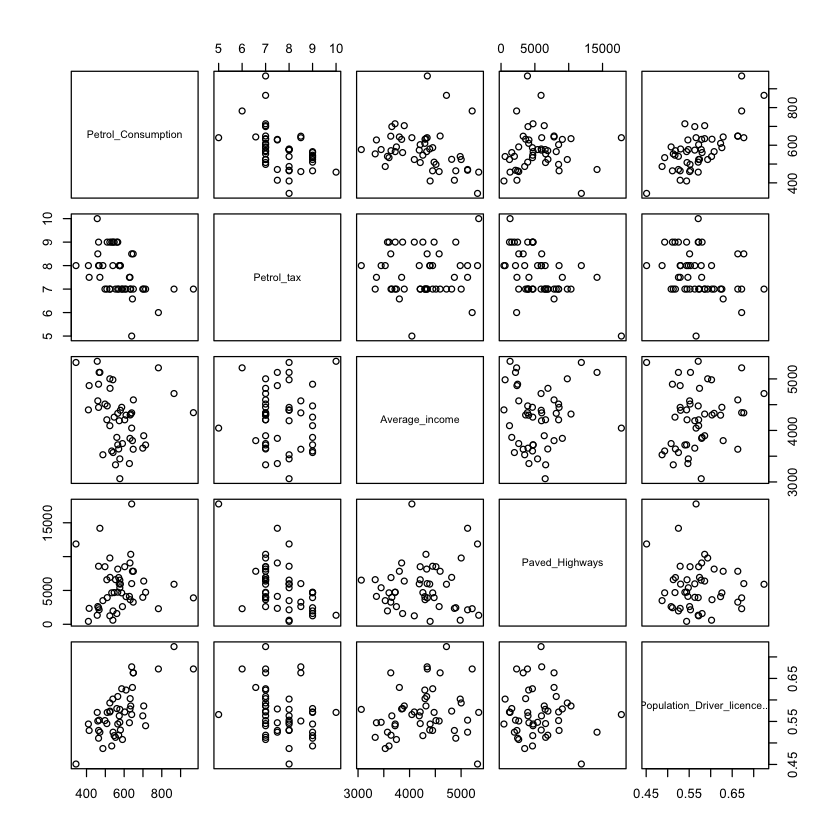

In [104]:
pairs(~Petrol_Consumption + Petrol_tax + Average_income + 
      Paved_Highways + Population_Driver_licence..., data=df)

Nhận xét: 
- Petrol_tax, Average_income có mối tương quan nghịch với biến y - Petrol Consumption
- Paved_Highways, Population Driver_licence có mối tương quan thuận với biến y - Petrol Consumption

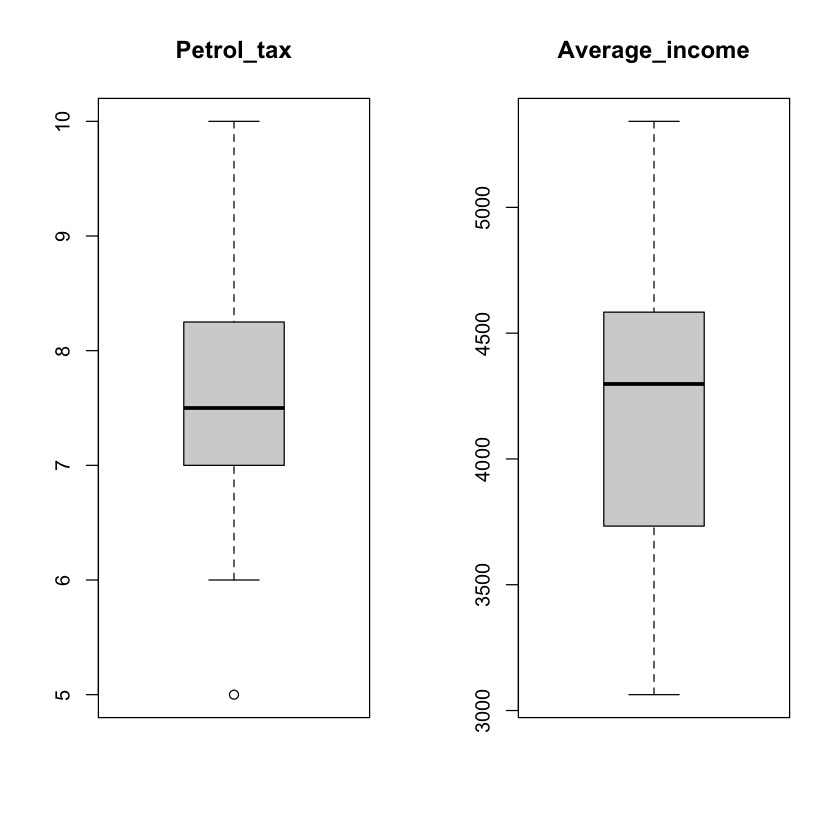

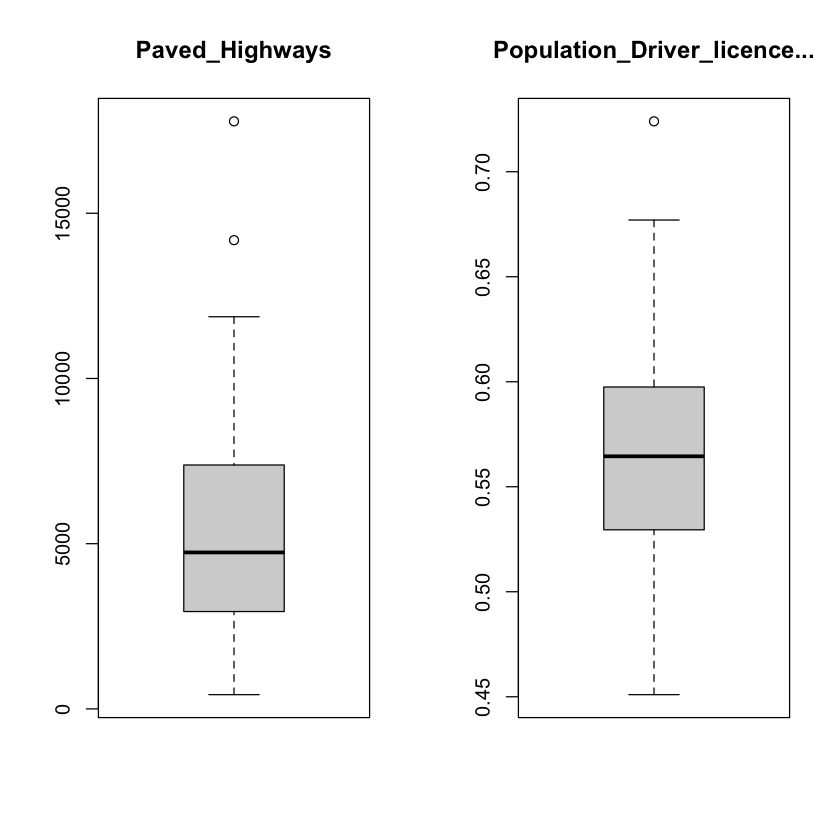

In [105]:
par(mfrow = c(1, 2))
boxplot(df[1], main = 'Petrol_tax')
boxplot(df[2], main = 'Average_income')
par(mfrow = c(1, 2))
boxplot(df[3], main = 'Paved_Highways')
boxplot(df[4], main = 'Population_Driver_licence...')

In [106]:
tax_outliers = boxplot.stats(df$Petrol_tax)$out
licence_outliers = boxplot.stats(df$Population_Driver_licence...)$out
df = df[!(df$Petrol_tax %in% tax_outliers),]
df = df[!(df$Population_Driver_licence... %in% licence_outliers),]
dim(df)

[1] 46  5

In [107]:
set.seed(1)

train_idx = sample(1:nrow(df), 0.8*nrow(df))
train_df = df[train_idx,]
test_df = df[-train_idx,]
print(dim(train_df))
print(dim(test_df))

[1] 36  5
[1] 10  5


In [108]:
model = lm(Petrol_Consumption ~ Petrol_tax + Population_Driver_licence..., data=train_df)
summary(model)


Call:
lm(formula = Petrol_Consumption ~ Petrol_tax + Population_Driver_licence..., 
    data = train_df)

Residuals:
     Min       1Q   Median       3Q      Max 
-118.505  -60.018   -7.387   46.659  234.871 

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept)                    115.12     231.33   0.498   0.6220    
Petrol_tax                     -37.25      16.16  -2.305   0.0276 *  
Population_Driver_licence...  1307.63     283.67   4.610  5.8e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 81.92 on 33 degrees of freedom
Multiple R-squared:  0.5214,	Adjusted R-squared:  0.4924 
F-statistic: 17.98 on 2 and 33 DF,  p-value: 5.242e-06


In [109]:
mse = mean(model$residuals^2)
rmse = sqrt(mse)
print(mse)
print(rmse)

[1] 6151.522
[1] 78.43164


In [110]:
predictions = predict(model, test_df)
test_mse = mean((test_df$Petrol_Consumption - predictions)^2)
test_rmse = sqrt(test_mse)
print(test_mse)
print(test_rmse)

[1] 3656.893
[1] 60.47225


Nhận xét: Model không bị overfiting

In [111]:
intercept = coef(model)[1]
beta_tax = coef(model)[2]
beta_licence = coef(model)[3]

In [112]:
y = predict(model, data.frame(Petrol_tax=9, Population_Driver_licence...=0.58))
y

1 
538.334

In [113]:
library('BMA')

Loading required package: survival

Loading required package: leaps

Loading required package: robustbase


Attaching package: ‘robustbase’


The following object is masked from ‘package:survival’:

    heart


Loading required package: inline

Loading required package: rrcov

Scalable Robust Estimators with High Breakdown Point (version 1.5-5)




In [122]:
yvar = train_df[, 'Petrol_Consumption']
xvars = train_df[, -5]
bma = bicreg(xvars, yvar, strict=F, OR=4)

In [123]:
summary(bma)


Call:
bicreg(x = xvars, y = yvar, strict = F, OR = 4)


  1  models were selected
 Best  1  models (cumulative posterior probability =  1 ): 

                              p!=0   EV         SD         model 1   
Intercept                     100    375.65991  204.08075   375.65991
Petrol_tax                    100    -35.42665   13.49106   -35.42665
Average_income                100     -0.08334    0.02123    -0.08334
Paved_Highways                  0      0.00000    0.00000       .    
Population_Driver_licence...  100   1450.60900  239.44292  1450.60900
                                                                     
nVar                                                            3    
r2                                                            0.677  
BIC                                                         -29.93204
post prob                                                     1      


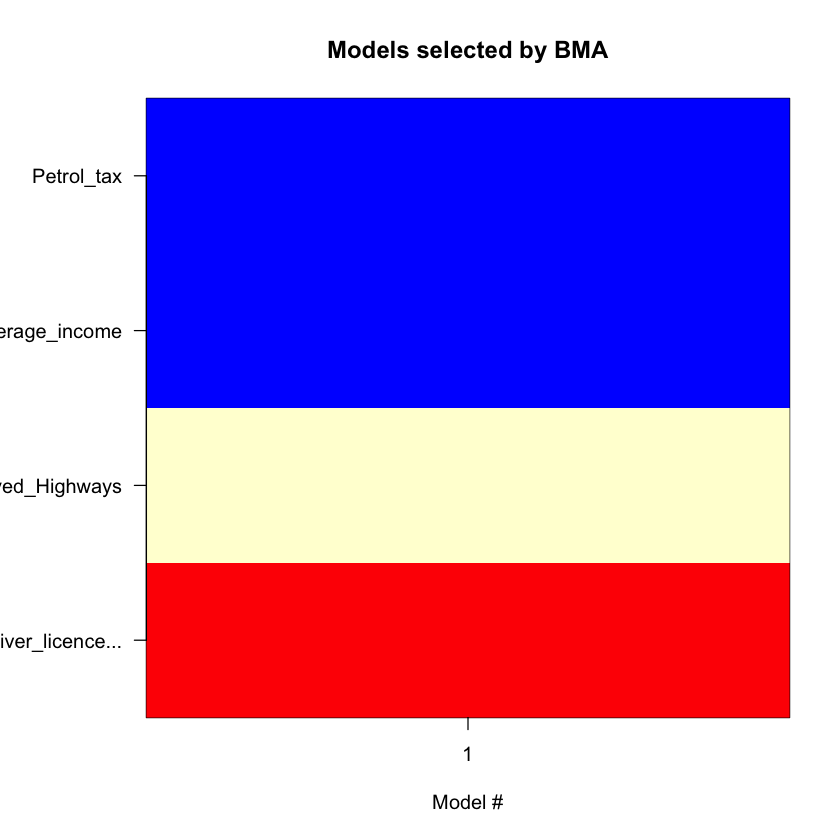

In [119]:
imageplot.bma(bma)

In [124]:
best_model = lm(Petrol_Consumption ~ Petrol_tax + Average_income + Population_Driver_licence..., data=train_df)
summary(best_model)


Call:
lm(formula = Petrol_Consumption ~ Petrol_tax + Average_income + 
    Population_Driver_licence..., data = train_df)

Residuals:
     Min       1Q   Median       3Q      Max 
-104.774  -48.868   -7.071   32.241  227.621 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   375.65991  204.08075   1.841 0.074948 .  
Petrol_tax                    -35.42665   13.49106  -2.626 0.013146 *  
Average_income                 -0.08334    0.02123  -3.926 0.000431 ***
Population_Driver_licence... 1450.60900  239.44292   6.058 9.17e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 68.34 on 32 degrees of freedom
Multiple R-squared:  0.677,	Adjusted R-squared:  0.6467 
F-statistic: 22.36 on 3 and 32 DF,  p-value: 5.409e-08


In [127]:
mse = mean(best_model$residuals^2)
rmse = sqrt(mse)
print(mse)
print(rmse)

[1] 4151.683
[1] 64.43355


In [128]:
predictions = predict(best_model, test_df)
test_mse = mean((test_df$Petrol_Consumption - predictions)^2)
test_rmse = sqrt(test_mse)
print(test_mse)
print(test_rmse)

[1] 3979.07
[1] 63.07987
